In [1]:
import pandas as pd
games = pd.read_csv('vgsales.csv')
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [2]:
games.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [3]:
cols = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for col in cols:
    print(col, '  -->  ', games[col].isnull().values.any())

Rank   -->   False
Name   -->   False
Platform   -->   False
Year   -->   True
Genre   -->   False
Publisher   -->   True
NA_Sales   -->   False
EU_Sales   -->   False
JP_Sales   -->   False
Other_Sales   -->   False
Global_Sales   -->   False


In [4]:
print(games['Year'].isnull().sum().sum())
print(games['Publisher'].isnull().sum().sum())

#since the number of NA is very low comparing to the whole dataset, we can drop these values
games = games.dropna()
games.isnull().values.any()

271
58


False

In [5]:
games.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [6]:
from datetime import datetime as dt
#converting a year from float to datetime format
games['Year'] = pd.to_datetime(games['Year'], format='%Y').dt.strftime('%Y')
games['Year'] = games['Year'].astype('datetime64[ns]')
games.head(10)

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_18836\2545333636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['Year'] = pd.to_datetime(games['Year'], format='%Y').dt.strftime('%Y')
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_18836\2545333636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['Year'] = games['Year'].astype('datetime64[ns]')


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989-01-01,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006-01-01,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006-01-01,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984-01-01,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006-05-29 00:06:32.462095744,0.265647,0.147731,0.078833,0.048426,0.540910
min,1.000000,1980-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007-01-01 00:00:00,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010-01-01 00:00:00,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020-01-01 00:00:00,41.490000,29.020000,10.220000,10.570000,82.740000
std,4792.654450,NaN,0.822432,0.509303,0.311879,0.190083,1.567345


In [8]:
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib widget

In [9]:
games = games.sort_values('Year')
games.sort_values('Year')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259,Asteroids,2600,1980-01-01,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
6317,6319,Bridge,2600,1980-01-01,Misc,Activision,0.25,0.02,0.00,0.00,0.27
1969,1971,Defender,2600,1980-01-01,Misc,Atari,0.99,0.05,0.00,0.01,1.05
5366,5368,Freeway,2600,1980-01-01,Action,Activision,0.32,0.02,0.00,0.00,0.34
1766,1768,Kaboom!,2600,1980-01-01,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
4658,4660,Hyrule Warriors,3DS,2016-01-01,Action,Nintendo,0.16,0.12,0.11,0.03,0.42
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017-01-01,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017-01-01,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16438,16441,Brothers Conflict: Precious Baby,PSV,2017-01-01,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


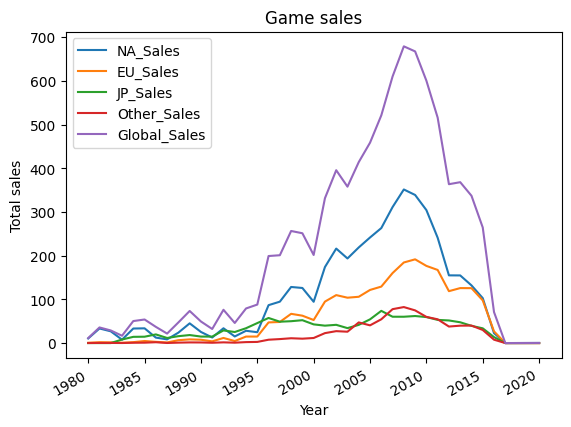

In [10]:
sal=games[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
sal=sal.groupby('Year', as_index=False).sum()
sal.plot('Year', ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.title('Game sales')
plt.show()

In [11]:
genres = games[['Year', 'Genre', 'Global_Sales']].groupby(['Year','Genre'], as_index=False).sum()
genres.sort_values('Global_Sales', ascending=False)

maxsells = pd.DataFrame(columns=('Genre', 'Global_Sales'))

# group by year and select maximum total for each year
max_totals = genres.groupby('Year')['Global_Sales'].max()
max_totals=dict(max_totals)
# loop through each year and retrieve corresponding genre value
for year, max_total in max_totals.items():
    genr = genres.loc[(genres['Year'] == year) & (genres['Global_Sales'] == max_total), 'Genre'].values[0]
    maxsells.loc[year] = [genr,max_total]
    #print(f"{year}: the most selled genre is {genr} with sales {round(max_total)} million USD")

print(maxsells)

                   Genre  Global_Sales
1980-01-01       Shooter          7.07
1981-01-01        Action         14.84
1982-01-01        Puzzle         10.03
1983-01-01      Platform          6.93
1984-01-01       Shooter         31.10
1985-01-01      Platform         43.17
1986-01-01        Action         13.74
1987-01-01      Fighting          5.42
1988-01-01      Platform         27.73
1989-01-01        Puzzle         37.75
1990-01-01      Platform         22.97
1991-01-01      Platform          7.64
1992-01-01      Fighting         15.25
1993-01-01      Platform         18.67
1994-01-01      Platform         28.74
1995-01-01      Platform         16.69
1996-01-01  Role-Playing         43.96
1997-01-01        Racing         31.91
1998-01-01        Sports         41.79
1999-01-01  Role-Playing         49.09
2000-01-01        Sports         41.19
2001-01-01        Action         59.39
2002-01-01        Action         86.77
2003-01-01        Action         67.93
2004-01-01        Action 

In [12]:
g=games[['Year', 'Platform', 'Rank']].groupby(['Year', 'Platform'], as_index=False).count()

['2600' 'NES' 'DS' 'PC' 'GB' 'GEN' 'SNES' 'GG' 'NG' 'SCD' '3DO' 'PS' 'SAT'
 'TG16' 'N64' 'PCFX' 'DC' 'WS' 'GBA' 'PS2' 'XB' 'GC' 'PSP' 'X360' 'PS3'
 'Wii' '3DS' 'PSV' 'WiiU' 'PS4' 'XOne']


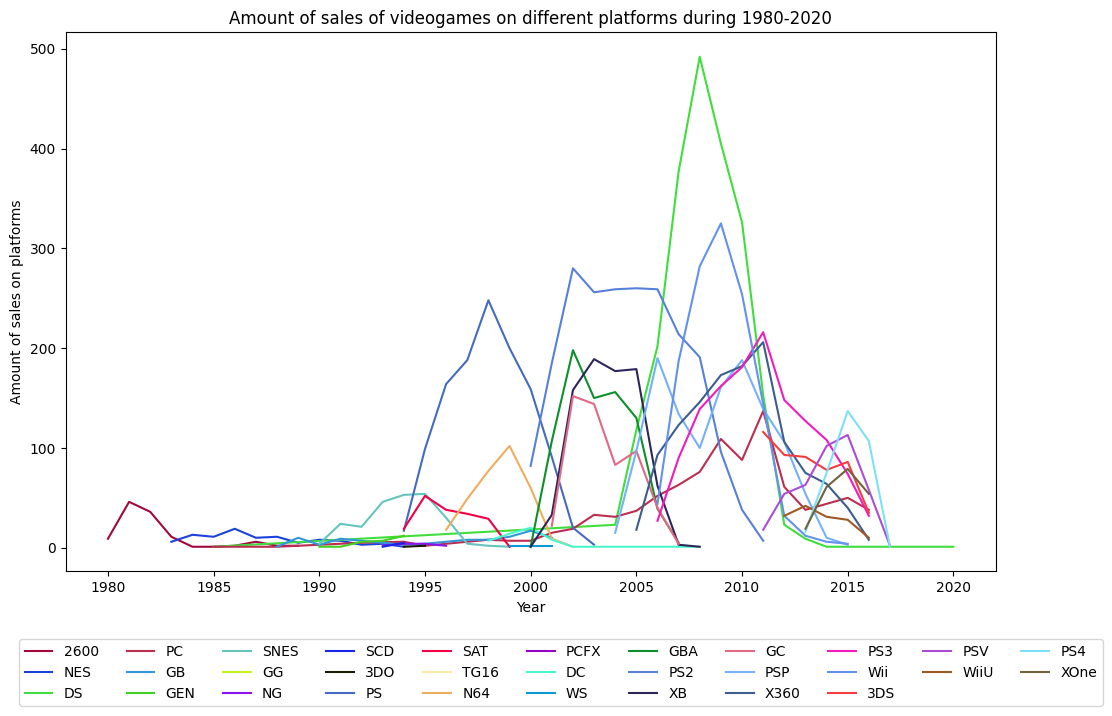

In [36]:
import numpy as np
platforms = g['Platform'].unique()
print(platforms)

plt.figure(figsize=(12,7))
for i in range(len(platforms)):
     a=g.query(f'Platform=="{platforms[i]}"')
     x=a['Year']
     y=a['Rank']
     r = np.round(np.random.rand(),2)
     gg = np.round(np.random.rand(),2)
     b = np.round(np.random.rand(),2)
     plt.plot(x, y, color=[r,gg,b])
     plt.legend(['2600', 'NES', 'DS', 'PC', 'GB', 'GEN', 'SNES', 'GG', 'NG', 'SCD', '3DO', 'PS', 'SAT',
                 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'GBA', 'PS2', 'XB', 'GC', 'PSP', 'X360', 'PS3',
                 'Wii', '3DS', 'PSV', 'WiiU', 'PS4', 'XOne'], loc=(-0.05, -0.25), ncol=11)
     plt.xlabel('Year')
     plt.ylabel('Amount of sales on platforms')
     plt.title('Amount of sales of videogames on different platforms during 1980-2020')

plt.show()

In [16]:
games.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259,Asteroids,2600,1980-01-01,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
6317,6319,Bridge,2600,1980-01-01,Misc,Activision,0.25,0.02,0.0,0.00,0.27
1969,1971,Defender,2600,1980-01-01,Misc,Atari,0.99,0.05,0.0,0.01,1.05
5366,5368,Freeway,2600,1980-01-01,Action,Activision,0.32,0.02,0.0,0.00,0.34
1766,1768,Kaboom!,2600,1980-01-01,Misc,Activision,1.07,0.07,0.0,0.01,1.15
6896,6898,Checkers,2600,1980-01-01,Misc,Atari,0.22,0.01,0.0,0.00,0.24
4025,4027,Ice Hockey,2600,1980-01-01,Sports,Activision,0.46,0.03,0.0,0.01,0.49
2669,2671,Boxing,2600,1980-01-01,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
544,545,Missile Command,2600,1980-01-01,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
3403,3405,BurgerTime,2600,1981-01-01,Puzzle,Mattel Interactive,0.55,0.03,0.0,0.01,0.59


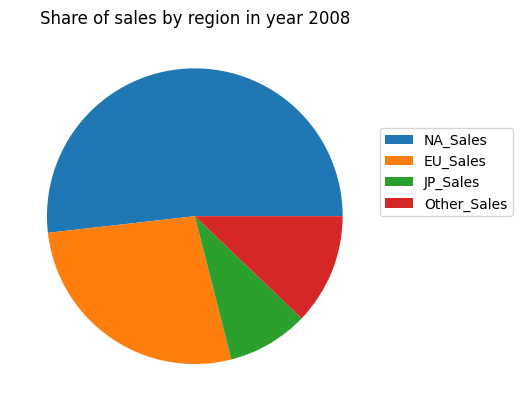

In [123]:
games_grouped=games.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
games_filtered = np.transpose(games_grouped[games_grouped['Year']=='2008-01-01'].set_index('Year'))
plt.pie(games_filtered.iloc[:, 0])
plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], loc=(1, 0.5))
plt.title('Share of sales by region in year 2008')
plt.show()

In [124]:
games.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259,Asteroids,2600,1980-01-01,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
6317,6319,Bridge,2600,1980-01-01,Misc,Activision,0.25,0.02,0.0,0.00,0.27
1969,1971,Defender,2600,1980-01-01,Misc,Atari,0.99,0.05,0.0,0.01,1.05
5366,5368,Freeway,2600,1980-01-01,Action,Activision,0.32,0.02,0.0,0.00,0.34
1766,1768,Kaboom!,2600,1980-01-01,Misc,Activision,1.07,0.07,0.0,0.01,1.15
6896,6898,Checkers,2600,1980-01-01,Misc,Atari,0.22,0.01,0.0,0.00,0.24
4025,4027,Ice Hockey,2600,1980-01-01,Sports,Activision,0.46,0.03,0.0,0.01,0.49
2669,2671,Boxing,2600,1980-01-01,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
544,545,Missile Command,2600,1980-01-01,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
3403,3405,BurgerTime,2600,1981-01-01,Puzzle,Mattel Interactive,0.55,0.03,0.0,0.01,0.59


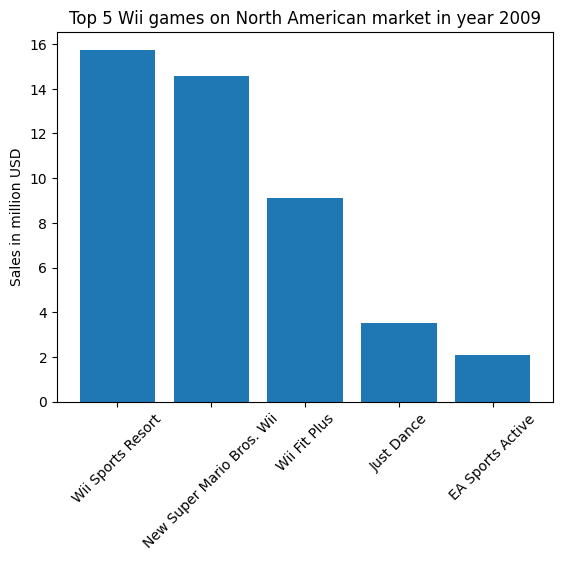

In [139]:
games_NA = games[(games['Year']=='2009-01-01') & (games['Platform']=='Wii')].sort_values('NA_Sales', ascending=False).iloc[:5, :]
plt.bar(games_NA['Name'], games_NA['NA_Sales'])
plt.xticks(rotation = 45)
plt.title('Top 5 Wii games on North American market in year 2009')
plt.ylabel('Sales in million USD')
plt.show()